# Task: 
### Use the programming language of your choice. 
### Use the Guardian Media Group API. 
1. Extract information about Justin Trudeau. 
2. Count how many articles about Justin Trudeau have been posted since 01.01.2018 until today: 


The output should consist of two columns: 

`Date` and `No. of articles` 

2018-01-01 3 

2018-01-02 4 

2018-01-03 2 


3. Calculate the average of all days for the above-mentioned period from “No. of articles”. 
4. In which section are most articles written? 
5. Show the evolution of the "No. of articles" over time for the above period. 
6. Are there any unusual events in the time series under investigation? 
7. If so, show these. Why are these unusual? (Define for yourself what you want to show by ordinary or unusual). 
8. Based on question one. Show the cause of the unusual event. 


Create a daily automated job that updates question 5 daily and creates an output that could be sent to recipients who have not seen the data before.

In [135]:
import requests
from datetime import datetime, timedelta
import pandas as pd
from tqdm import tqdm  # Import the tqdm library
import time

In [136]:
# Your API key (replace 'YOUR_API_KEY' with your actual API key)
# api_key = 'c285e2dc-3ffb-4c53-a3b6-b0e9b89a19be' #hotmail
# api_key = '0502d299-746a-4a50-abe8-666a18550e88' #nnsmostwanted
api_key = 'f73d5b88-41de-48cc-be9f-fac55dccd779' #nishanitinsingh@gmail.com
# Base URL for The Guardian API
base_url = 'http://content.guardianapis.com/search'

## Extract data and count of articles per day

In [76]:
# Setting the start and end dates for the query
start_date = datetime(2018, 1, 1)
end_date = datetime.now()  # Assuming "today" is your script run date

# Calculate the total number of days for the progress bar
total_days = (end_date - start_date).days + 1

# This will store our data: date, number of articles, and sections
data = []

# Initialize the progress bar
with tqdm(total=total_days, desc="Fetching articles") as pbar:
    # Loop through each day in the date range
    current_date = start_date
    while current_date <= end_date:
        # Format the current date in YYYY-MM-DD
        date_str = current_date.strftime('%Y-%m-%d')
        
        # Set up the parameters for the API request
        params = {
            'q': 'Justin Trudeau',  # Query for articles about Justin Trudeau
            'from-date': date_str,
            'to-date': date_str,
            'api-key': api_key,
            'page-size': 200,  # Adjust based on expected articles per day; mind the API's limits
            'show-fields': 'sectionName'  # Request to include section names in the response
        }
        
        # Make the request to The Guardian API
        response = requests.get(base_url, params=params)
        
        # Check if the request was successful
        if response.status_code == 200:
            # Convert the response to JSON
            data_json = response.json()
            
            # Extract articles
            articles = data_json['response']['results']
            sections = set(article['sectionName'] for article in articles)  # Extract unique sections
            print(sections, flush=True)
            # For each unique section, count articles and append to data
            for section in sections:
                section_articles_count = sum(article['sectionName'] == section for article in articles)
                data.append([date_str, section_articles_count, section])
        
        # Update the progress bar
        pbar.update(1)
        
        # Go to the next day
        current_date += timedelta(days=1)

# Convert the data list to a DataFrame
df = pd.DataFrame(data, columns=['Date', 'No. of articles', 'Section'])

Fetching articles:   3%|▌                     | 62/2276 [00:07<04:40,  7.89it/s]


KeyboardInterrupt: 

In [75]:
df.shape

(0, 3)

In [22]:
# Setting the start and end dates for the query
start_date = datetime(2018, 1, 1)
end_date = datetime.now()  # Assuming "today" is your script run date

# Calculate the total number of days for the progress bar
total_days = (end_date - start_date).days + 1

# This will store our data: date, number of articles, and sections
data = []

# Initialize the progress bar
with tqdm(total=total_days, desc="Fetching articles") as pbar:
    # Loop through each day in the date range
    current_date = start_date
    while current_date <= end_date:
        # Format the current date in YYYY-MM-DD
        date_str = current_date.strftime('%Y-%m-%d')
        
        # Set up the parameters for the API request
        params = {
            'q': 'Justin Trudeau',  # Query for articles about Justin Trudeau
            'from-date': date_str,
            'to-date': date_str,
            'api-key': api_key,
            'page-size': 200,  # Adjust based on expected articles per day; mind the API's limits
            'show-fields': 'sectionName'  # Request to include section names in the response
        }
        
        # Make the request to The Guardian API
        response = requests.get(base_url, params=params)
        
        # Check if the request was successful
        if response.status_code == 200:
            # Convert the response to JSON
            data_json = response.json()
            
            # Extract articles
            articles = data_json['response']['results']
            sections = set(article['sectionName'] for article in articles)  # Extract unique sections
            
            # For each unique section, count articles and append to data
            for section in sections:
                section_articles_count = sum(article['sectionName'] == section for article in articles)
                data.append([date_str, section_articles_count, section])
        
        # Update the progress bar
        pbar.update(1)
        
        # Go to the next day
        current_date += timedelta(days=1)

# Convert the data list to a DataFrame
df = pd.DataFrame(data, columns=['Date', 'No. of articles', 'Section'])


Fetching articles: 100%|████████████████████| 2276/2276 [05:31<00:00,  6.87it/s]


In [31]:
df.head(5)

,Date,No. of articles,Section
0,2019-12-08,1,Music
1,2019-12-08,1,Television & radio
2,2019-12-08,1,Football
3,2019-12-08,1,Art and design
4,2019-12-08,1,Opinion


In [32]:
df.describe(include='all').fillna('')

,Date,No. of articles,Section
count,3062,3062.0,3062
unique,836,,37
top,2020-11-19,,World news
freq,11,,450
mean,,1.259308,
std,,0.614033,
min,,1.0,
25%,,1.0,
50%,,1.0,
75%,,1.0,


In [33]:
df.tail()

,Date,No. of articles,Section
3057,2024-03-21,1,US news
3058,2024-03-22,1,Fashion
3059,2024-03-22,1,UK news
3060,2024-03-23,1,Music
3061,2024-03-24,1,Sport


In [25]:
# Setting the start and end dates for the query
start_date = datetime(2018, 1, 1)
end_date = datetime.now()  # Assuming "today" is your script run date

# This will store our date and article count
data = []

# Loop through each day in the date range
current_date = start_date
while current_date <= end_date:
    # Format the current date in YYYY-MM-DD
    date_str = current_date.strftime('%Y-%m-%d')
    
    # Set up the parameters for the API request
    params = {
        'q': 'Justin Trudeau',  # Query for articles about Justin Trudeau
        'from-date': date_str,
        'to-date': date_str,
        'api-key': api_key,
        'page-size': 200  # Adjust based on how many articles you expect per day; The Guardian's API may have a limit
    }
    
    # Make the request to The Guardian API
    response = requests.get(base_url, params=params)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Convert the response to JSON
        data_json = response.json()
        
        # Get the number of articles from the response
        num_articles = data_json['response']['total']
        
        # Append the date and number of articles to our data list
        data.append([date_str, num_articles])
        
    # Go to the next day
    current_date += timedelta(days=1)

# Convert the data list to a DataFrame
df_2 = pd.DataFrame(data, columns=['Date', 'No. of articles'])


In [26]:
df_2.head(10)

,Date,No. of articles
0,2018-01-01,3
1,2018-01-02,3
2,2018-01-03,5
3,2018-01-04,1
4,2018-01-05,2
5,2018-01-06,2
6,2018-01-07,3
7,2018-01-08,4
8,2018-01-09,5
9,2018-01-10,3


In [27]:
df_2.describe(include='all').fillna('')

,Date,No. of articles
count,645,645.0
unique,645,
top,2018-01-01,
freq,1,
mean,,4.485271
std,,2.49506
min,,0.0
25%,,3.0
50%,,4.0
75%,,6.0


In [29]:
df_2.tail(5)

,Date,No. of articles
640,2021-09-13,4
641,2021-09-14,7
642,2021-09-16,6
643,2021-09-17,3
644,2021-09-18,2


In [35]:
import requests
import pandas as pd
from datetime import datetime, timedelta
from collections import Counter

# Your API key for the Guardian API
api_key = 'c285e2dc-3ffb-4c53-a3b6-b0e9b89a19be'

# Modified function to fetch articles and collect section names with error handling
def fetch_articles_and_sections(start_date, end_date):
    base_url = 'https://content.guardianapis.com/search'
    date_format = "%Y-%m-%d"
    current_date = datetime.strptime(start_date, date_format)
    end_date = datetime.strptime(end_date, date_format)
    articles_data = []
    sections_count = Counter()

    while current_date <= end_date:
        date_str = current_date.strftime(date_format)
        params = {
            'q': 'Justin Trudeau',
            'from-date': date_str,
            'to-date': date_str,
            'api-key': api_key,
            'page-size': 200,
            'show-fields': 'all'  # Modified to 'all' to ensure we're not missing the field due to incorrect parameter
        }
        try:
            response = requests.get(base_url, params=params).json()
            if 'response' in response:
                for article in response['response']['results']:
                    date = article['webPublicationDate'][:10]  # Extract date part
                    section_name = article.get('sectionName', 'Unknown')  # Default to 'Unknown' if not found
                    articles_data.append({'Date': date, 'Section': section_name})
                    sections_count[section_name] += 1
            else:
                print(f"Warning: No 'response' key in JSON returned for date {date_str}.")
        except Exception as e:
            print(f"Error fetching articles for date {date_str}: {e}")

        current_date += timedelta(days=1)

    return articles_data, sections_count

# Function to calculate the average number of articles
def calculate_average(articles_data):
    df = pd.DataFrame(articles_data)
    return len(df) / len(df['Date'].unique()) if df['Date'].unique().size > 0 else 0

# Main execution
start_date = '2018-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')
articles_data, sections_count = fetch_articles_and_sections(start_date, end_date)
average_articles = calculate_average(articles_data)

# Finding the most common section
most_common_section, most_common_count = sections_count.most_common(1)[0] if sections_count else ('None', 0)

# Output the data
print(f'Articles data sample:\n{pd.DataFrame(articles_data).head()}')
print(f'Average number of articles per day: {average_articles:.2f}')
print(f'Most articles written in section: {most_common_section} with {most_common_count} articles')


KeyboardInterrupt: 

In [36]:
response

<Response [429]>

In [ ]:
# Loop through each day in the date range
current_date = start_date
while current_date <= end_date:
    # Format the current date in YYYY-MM-DD
    date_str = current_date.strftime('%Y-%m-%d')
    
    # Set up the parameters for the API request
    params = {
        'q': 'Justin Trudeau',  # Query for articles about Justin Trudeau
        'from-date': date_str,
        'to-date': date_str,
        'api-key': api_key,
        'page-size': 200  # Adjust based on how many articles you expect per day; The Guardian's API may have a limit
    }
    
    # Make the request to The Guardian API
    response = requests.get(base_url, params=params)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Convert the response to JSON
        data_json = response.json()

In [39]:
data

[['2018-01-01', 3],
 ['2018-01-02', 3],
 ['2018-01-03', 5],
 ['2018-01-04', 1],
 ['2018-01-05', 2],
 ['2018-01-06', 2],
 ['2018-01-07', 3],
 ['2018-01-08', 4],
 ['2018-01-09', 5],
 ['2018-01-10', 3],
 ['2018-01-11', 3],
 ['2018-01-12', 6],
 ['2018-01-13', 3],
 ['2018-01-14', 0],
 ['2018-01-15', 4],
 ['2018-01-16', 0],
 ['2018-01-17', 7],
 ['2018-01-18', 5],
 ['2018-01-19', 9],
 ['2018-01-20', 2],
 ['2018-01-21', 3],
 ['2018-01-22', 6],
 ['2018-01-23', 2],
 ['2018-01-24', 1],
 ['2018-01-25', 4],
 ['2018-01-26', 3],
 ['2018-01-27', 1],
 ['2018-01-28', 4],
 ['2018-01-29', 6],
 ['2018-01-30', 3],
 ['2018-01-31', 5],
 ['2018-02-01', 4],
 ['2018-02-02', 6],
 ['2018-02-03', 4],
 ['2018-02-04', 2],
 ['2018-02-05', 8],
 ['2018-02-06', 2],
 ['2018-02-07', 11],
 ['2018-02-08', 4],
 ['2018-02-09', 9],
 ['2018-02-10', 3],
 ['2018-02-11', 3],
 ['2018-02-12', 4],
 ['2018-02-13', 2],
 ['2018-02-14', 4],
 ['2018-02-15', 2],
 ['2018-02-16', 5],
 ['2018-02-17', 2],
 ['2018-02-18', 7],
 ['2018-02-19', 3],

In [108]:
# Setting the start and end dates for the query
start_date = datetime(2018, 1, 1)
# start_date = datetime(2023,11, 1)#2023-05-12, 2023-11-01
end_date = datetime.now()  # Assuming "today" is your script run date

# Calculate the total number of days for the progress bar
total_days = (end_date - start_date).days + 1

# This will store our data: date, number of articles, and sections
data = []

# Initialize the progress bar
with tqdm(total=total_days, desc="Fetching articles") as pbar:
    # Loop through each day in the date range
    current_date = start_date
    while current_date <= end_date:
        # Format the current date in YYYY-MM-DD
        date_str = current_date.strftime('%Y-%m-%d')
        
        # Set up the parameters for the API request
        params = {
            'q': 'Justin Trudeau',  # Query for articles about Justin Trudeau
            'from-date': date_str,
            'to-date': date_str,
            'api-key': api_key,
            'page-size': 50,  # Adjust based on expected articles per day; mind the API's limits
            'show-fields': 'all'  # Attempt to include all fields that might contain 'sectionName'
        }
        
        # Make the request to The Guardian API
        response = requests.get(base_url, params=params)
        
        # Check if the request was successful
        if response.status_code == 200:
            # Convert the response to JSON
            data_json = response.json()
            
            # Extract articles
            articles = data_json['response']['results']
            # Initialize a variable to keep track of articles without a section
            no_section_count = 0
            
            # Extract unique sections, accounting for potential missing section names
            for article in articles:
                section = article.get('sectionName', 'Unknown')
                if section == 'Unknown':
                    no_section_count += 1
                else:
                    data.append([date_str, 1, section])  # Assuming each article is a unique entry, thus '1'

            # If there were articles without a section, add them under 'Unknown'
            if no_section_count > 0:
                data.append([date_str, no_section_count, 'Unknown'])
         time.sleep(1)  # Delay between each request to avoid hitting rate limits

        # Update the progress bar
        pbar.update(1)
        
        # Go to the next day
        current_date += timedelta(days=1)

# Convert the data list to a DataFrame and aggregate counts by date and section
df = pd.DataFrame(data, columns=['Date', 'No. of articles', 'Section'])
# df_aggregated3 = df.groupby(['Date', 'Section']).sum().reset_index()


Fetching articles: 100%|██████████████████████| 147/147 [00:26<00:00,  5.53it/s]


In [86]:
df.head(5)

,Date,No. of articles,Section
0,2018-01-01,1,Society
1,2018-01-01,1,World news
2,2018-01-01,1,Sport
3,2018-01-02,1,Opinion
4,2018-01-02,1,Television & radio


In [88]:
df.shape

(6740, 3)

In [89]:
df.tail()

,Date,No. of articles,Section
6735,2023-05-12,1,Music
6736,2023-05-12,1,Opinion
6737,2023-05-12,1,Sport
6738,2023-05-12,1,Football
6739,2023-05-12,1,Media


In [82]:
data_json

{'message': 'API rate limit exceeded'}

In [87]:
df_aggregated.head(5)

,Date,Section,No. of articles
0,2018-01-01,Society,1
1,2018-01-01,Sport,1
2,2018-01-01,World news,1
3,2018-01-02,Music,1
4,2018-01-02,Opinion,1


In [94]:
df.to_csv('guardian1.csv', index=False)

In [95]:
df_aggregated.to_csv('guardian_agg1.csv', index=False)

In [90]:
data_json

{'response': {'status': 'ok',
  'userTier': 'developer',
  'total': 10,
  'startIndex': 1,
  'pageSize': 200,
  'currentPage': 1,
  'pages': 1,
  'orderBy': 'relevance',
  'results': [{'id': 'uk-news/2023/may/12/justin-welby-from-crowning-king-charles-to-conviction-and-speeding-fine',
    'type': 'article',
    'sectionId': 'uk-news',
    'sectionName': 'UK news',
    'webPublicationDate': '2023-05-12T17:55:34Z',
    'webTitle': 'Justin Welby: from crowning King Charles to conviction and speeding fine ',
    'webUrl': 'https://www.theguardian.com/uk-news/2023/may/12/justin-welby-from-crowning-king-charles-to-conviction-and-speeding-fine',
    'apiUrl': 'https://content.guardianapis.com/uk-news/2023/may/12/justin-welby-from-crowning-king-charles-to-conviction-and-speeding-fine',
    'fields': {'headline': 'Justin Welby: from crowning King Charles to conviction and speeding fine ',
     'standfirst': '<p>Archbishop of Canterbury’s week went from the sublime, presiding over the monarch’s 

In [91]:
articles

[{'id': 'uk-news/2023/may/12/justin-welby-from-crowning-king-charles-to-conviction-and-speeding-fine',
  'type': 'article',
  'sectionId': 'uk-news',
  'sectionName': 'UK news',
  'webPublicationDate': '2023-05-12T17:55:34Z',
  'webTitle': 'Justin Welby: from crowning King Charles to conviction and speeding fine ',
  'webUrl': 'https://www.theguardian.com/uk-news/2023/may/12/justin-welby-from-crowning-king-charles-to-conviction-and-speeding-fine',
  'apiUrl': 'https://content.guardianapis.com/uk-news/2023/may/12/justin-welby-from-crowning-king-charles-to-conviction-and-speeding-fine',
  'fields': {'headline': 'Justin Welby: from crowning King Charles to conviction and speeding fine ',
   'standfirst': '<p>Archbishop of Canterbury’s week went from the sublime, presiding over the monarch’s coronation, to arraignment in a magistrates court </p>',
   'trailText': 'Archbishop of Canterbury’s week went from the sublime, presiding over the monarch’s coronation, to arraignment in a magistrates

In [93]:
data

[['2018-01-01', 1, 'Society'],
 ['2018-01-01', 1, 'World news'],
 ['2018-01-01', 1, 'Sport'],
 ['2018-01-02', 1, 'Opinion'],
 ['2018-01-02', 1, 'Television & radio'],
 ['2018-01-02', 1, 'Music'],
 ['2018-01-03', 1, 'World news'],
 ['2018-01-03', 1, 'Environment'],
 ['2018-01-03', 1, 'Opinion'],
 ['2018-01-03', 1, 'Film'],
 ['2018-01-03', 1, 'Science'],
 ['2018-01-04', 1, 'Society'],
 ['2018-01-05', 1, 'Culture'],
 ['2018-01-05', 1, 'Opinion'],
 ['2018-01-06', 1, 'Sport'],
 ['2018-01-06', 1, 'Football'],
 ['2018-01-07', 1, 'Media'],
 ['2018-01-07', 1, 'US news'],
 ['2018-01-07', 1, 'Technology'],
 ['2018-01-08', 1, 'Politics'],
 ['2018-01-08', 1, 'Politics'],
 ['2018-01-08', 1, 'Society'],
 ['2018-01-08', 1, 'Film'],
 ['2018-01-09', 1, 'Politics'],
 ['2018-01-09', 1, 'Opinion'],
 ['2018-01-09', 1, 'UK news'],
 ['2018-01-09', 1, 'Politics'],
 ['2018-01-09', 1, 'Music'],
 ['2018-01-10', 1, 'World news'],
 ['2018-01-10', 1, 'Opinion'],
 ['2018-01-10', 1, 'Technology'],
 ['2018-01-11', 1, '

In [97]:
df.describe(include='all').fillna('')

,Date,No. of articles,Section
count,6740,6740.0,6740
unique,1468,,41
top,2020-03-13,,World news
freq,19,,1209
mean,,1.0,
std,,0.0,
min,,1.0,
25%,,1.0,
50%,,1.0,
75%,,1.0,


In [98]:
df_aggregated.describe(include='all').fillna('')

,Date,Section,No. of articles
count,5350,5350,5350.0
unique,1468,41,
top,2020-11-19,World news,
freq,11,757,
mean,,,1.259813
std,,,0.63205
min,,,1.0
25%,,,1.0
50%,,,1.0
75%,,,1.0


In [99]:
df_summary = df.groupby('Date')['No. of articles'].sum().reset_index()

# Display the new DataFrame
df_summary.head(10)

,Date,No. of articles
0,2018-01-01,3
1,2018-01-02,3
2,2018-01-03,5
3,2018-01-04,1
4,2018-01-05,2
5,2018-01-06,2
6,2018-01-07,3
7,2018-01-08,4
8,2018-01-09,5
9,2018-01-10,3


In [100]:
df_summary.shape

(1468, 2)

In [102]:
df_summary.head(10)

,Date,No. of articles
0,2018-01-01,3
1,2018-01-02,3
2,2018-01-03,5
3,2018-01-04,1
4,2018-01-05,2
5,2018-01-06,2
6,2018-01-07,3
7,2018-01-08,4
8,2018-01-09,5
9,2018-01-10,3


In [101]:
df_summary.tail(10)

,Date,No. of articles
1458,2023-04-25,3
1459,2023-04-26,6
1460,2023-04-30,1
1461,2023-05-01,3
1462,2023-05-02,4
1463,2023-05-03,7
1464,2023-05-04,7
1465,2023-05-07,3
1466,2023-05-08,5
1467,2023-05-12,10


In [106]:
print(df2.shape)
df2.head(10)

(812, 3)


,Date,No. of articles,Section
0,2023-05-01,1,Sport
1,2023-05-01,1,UK news
2,2023-05-01,1,Football
3,2023-05-02,1,Politics
4,2023-05-02,1,Stage
5,2023-05-02,1,Politics
6,2023-05-02,1,Politics
7,2023-05-03,1,World news
8,2023-05-03,1,UK news
9,2023-05-03,1,Sport


In [107]:
df2.tail(10)

,Date,No. of articles,Section
802,2023-10-30,1,Television & radio
803,2023-10-30,1,Technology
804,2023-10-30,1,Technology
805,2023-10-30,1,Television & radio
806,2023-10-30,1,World news
807,2023-10-30,1,Money
808,2023-11-01,1,Football
809,2023-11-01,1,World news
810,2023-11-01,1,Football
811,2023-11-01,1,Business


In [112]:
df2.to_csv('guardian2.csv', index=False)

In [110]:
print(df3.shape)
df3.head(10)

(547, 3)


,Date,No. of articles,Section
0,2023-11-01,1,Football
1,2023-11-01,1,World news
2,2023-11-01,1,Football
3,2023-11-01,1,Business
4,2023-11-02,1,Opinion
5,2023-11-02,1,Technology
6,2023-11-02,1,Sport
7,2023-11-02,1,Sport
8,2023-11-03,1,UK news
9,2023-11-03,1,Music


In [111]:
df3.tail(10)

,Date,No. of articles,Section
537,2024-03-20,1,US news
538,2024-03-21,1,Books
539,2024-03-21,1,US news
540,2024-03-21,1,Politics
541,2024-03-22,1,Fashion
542,2024-03-22,1,UK news
543,2024-03-23,1,Music
544,2024-03-24,1,Sport
545,2024-03-25,1,Business
546,2024-03-26,1,Australia news


In [113]:
df3.to_csv('guardian3.csv', index=False)

## Load the CSVs

In [114]:
guardian1 = pd.read_csv('guardian1.csv')
guardian2 = pd.read_csv('guardian2.csv')
guardian3 = pd.read_csv('guardian3.csv')

In [115]:
guardian1.head(5)

,Date,No. of articles,Section
0,2018-01-01,1,Society
1,2018-01-01,1,World news
2,2018-01-01,1,Sport
3,2018-01-02,1,Opinion
4,2018-01-02,1,Television & radio


In [116]:
guardian2.head(5)

,Date,No. of articles,Section
0,2023-05-01,1,Sport
1,2023-05-01,1,UK news
2,2023-05-01,1,Football
3,2023-05-02,1,Politics
4,2023-05-02,1,Stage


In [117]:
guardian3.head(5)

,Date,No. of articles,Section
0,2023-11-01,1,Football
1,2023-11-01,1,World news
2,2023-11-01,1,Football
3,2023-11-01,1,Business
4,2023-11-02,1,Opinion


### Check out overlapping rows

In [128]:
# What is the end of the guardian1 csv

guardian1[guardian1['Date']>='2023-05-01']

,Date,No. of articles,Section
6701,2023-05-01,1,Sport
6702,2023-05-01,1,UK news
6703,2023-05-01,1,Football
6704,2023-05-02,1,Politics
6705,2023-05-02,1,Stage
6706,2023-05-02,1,Politics
6707,2023-05-02,1,Politics
6708,2023-05-03,1,World news
6709,2023-05-03,1,UK news
6710,2023-05-03,1,Sport


In [126]:
# Check out first values from guardian2

guardian2.head(60)

,Date,No. of articles,Section
0,2023-05-01,1,Sport
1,2023-05-01,1,UK news
2,2023-05-01,1,Football
3,2023-05-02,1,Politics
4,2023-05-02,1,Stage
5,2023-05-02,1,Politics
6,2023-05-02,1,Politics
7,2023-05-03,1,World news
8,2023-05-03,1,UK news
9,2023-05-03,1,Sport


In [129]:
start_date = datetime(2018, 1, 1)
# start_date = datetime(2023,11, 1)#2023-05-12, 2023-11-01
end_date = datetime.now()  # Assuming "today" is your script run date

# Calculate the total number of days for the progress bar
total_days = (end_date - start_date).days + 1
total_days

2277

In [132]:
start_date = datetime(2018, 1, 1)
end_date = datetime.now()

data = []

with tqdm(total=(end_date - start_date).days + 1, desc="Fetching articles") as pbar:
    current_date = start_date
    while current_date <= end_date:
        date_str = current_date.strftime('%Y-%m-%d')
        page = 1
        total_pages = 1  # Will update based on API response
        
        while page <= total_pages:
            params = {
                'q': 'Justin Trudeau',
                'from-date': date_str,
                'to-date': date_str,
                'api-key': api_key,
                'page-size': 50,
                'page': page,
                'show-fields': 'all'
            }
            response = requests.get(base_url, params=params)
            
            if response.status_code == 200:
                data_json = response.json()
                total_pages = data_json['response']['pages']
                articles = data_json['response']['results']
                for article in articles:
                    section = article.get('sectionName', 'Unknown')
                    data.append([date_str, 1, section])
                page += 1
            elif response.status_code == 429:
                time.sleep(10)  # Wait 10 seconds if rate limit is exceeded
                continue  # Retry the same page
            else:
                print(f"Failed to fetch data for {date_str}, page {page}. Status code: {response.status_code}")
                break  # Exit the loop on failure
            
            time.sleep(1)  # Delay between each request to avoid hitting rate limits
        
        pbar.update(1)
        current_date += timedelta(days=1)

df = pd.DataFrame(data, columns=['Date', 'No. of articles', 'Section'])

Fetching articles:  51%|████████▏       | 1172/2277 [1:12:30<1:08:22,  3.71s/it]


KeyboardInterrupt: 

In [143]:
def fetch_articles(api_key, query, from_date, to_date, page_size=200):
    base_url = "https://content.guardianapis.com/search"
    articles = []
    current_page = 1
    total_pages = 1  # Initialized with 1 to ensure the loop starts
    
    print(f"Fetching articles for {query} from {from_date} to {to_date}...")
    
    while current_page <= total_pages:
        params = {
            'api-key': api_key,
            'q': query,
            'from-date': from_date,
            'to-date': to_date,
            'page': current_page,
            'page-size': page_size,
            'order-by': "newest"
        }
        
        response = requests.get(base_url, params=params)
        data = response.json()
        
        if data['response']['status'] == 'ok':
            articles.extend(data['response']['results'])
            if current_page % 10 == 0 or current_page == 1 or current_page == total_pages:
                print(f"Processed page {current_page} of {data['response']['pages']}.")
            current_page += 1
            total_pages = data['response']['pages']
        else:
            print("Error fetching the data: ", data['response']['status'])
            break

    print(f"Finished fetching articles. Total articles fetched: {len(articles)}")
    return articles

# api_key = 'YOUR_API_KEY'  # Replace with your Guardian API key
query = "Justin Trudeau"
from_date = "2018-01-01"
to_date = datetime.now().strftime('%Y-%m-%d')  # Today's date in YYYY-MM-DD format

articles = fetch_articles(api_key, query, from_date, to_date)

# Considering the data rate limit, it might be best to save or process the data instead of printing it.
# Save the articles to a JSON file
with open('articles2.json', 'w') as file:
    json.dump(articles, file, indent=2)
    
articles_json = json.dumps(articles, indent=2)

# Print the JSON data or save it to a file
# print(articles_json)

Fetching articles for Justin Trudeau from 2018-01-01 to 2024-03-26...
Processed page 1 of 51.
Processed page 10 of 51.
Processed page 20 of 51.
Processed page 30 of 51.
Processed page 40 of 51.
Processed page 50 of 51.
Processed page 51 of 51.
Finished fetching articles. Total articles fetched: 10168


In [160]:
import pandas as pd
from collections import defaultdict

# Assuming 'articles' is your list of articles

# Process the articles to group by date and section, counting the number of articles
articles_count = defaultdict(int)
section_names = defaultdict(set)

for article in articles:
    date = article['webPublicationDate'].split('T')[0]  # Extract just the date part
    section = article['sectionName']
    articles_count[(date, section)] += 1
    section_names[date].add(section)
# print(len(articles_count))
# Prepare data for DataFrame
data_for_df = []

for (date, section), count in articles_count.items():
    data_for_df.append({
        'Date': date,
        'Number of Articles': count,
        'SectionName': section
    })

# Create DataFrame
df = pd.DataFrame(data_for_df)

# Optionally, sort by Date and then SectionName for better readability
df.sort_values(by=['Date', 'SectionName'], inplace=True)

# Display the DataFrame
# print(df.head())  # Show the first few rows

# Save to CSV file, if needed
df.to_csv('articles_count2.csv', index=False)


8109


In [156]:
# len(articles_json)
len(articles)

10168

In [161]:
df.shape

(8109, 3)

In [162]:
df.head()

,Date,Number of Articles,SectionName
8108,2018-01-01,1,Society
8106,2018-01-01,1,Sport
8107,2018-01-01,1,World news
8105,2018-01-02,1,Music
8103,2018-01-02,1,Opinion


In [163]:
df.tail()

,Date,Number of Articles,SectionName
4,2024-03-22,1,UK news
3,2024-03-23,1,Music
2,2024-03-24,1,Sport
1,2024-03-25,1,Business
0,2024-03-26,1,Australia news


In [177]:
df['Date'].nunique()

2221

In [174]:
df[df['Number of Articles']==1].shape

(6591, 3)

In [176]:
df['Number of Articles'].sum()

10168

In [175]:
6591+1518

8109

## Read the saved csv

In [179]:
df = pd.read_csv('articles_count2.csv')
print(df.shape)
df.head(6)

(8109, 3)


,Date,Number of Articles,SectionName
0,2018-01-01,1,Society
1,2018-01-01,1,Sport
2,2018-01-01,1,World news
3,2018-01-02,1,Music
4,2018-01-02,1,Opinion
5,2018-01-02,1,Television & radio


In [180]:
# Group by Date and sum the Number of Articles to get total articles per day
daily_totals = df.groupby('Date')['Number of Articles'].sum()

# Calculate the average number of articles per day
average_articles_per_day = daily_totals.mean()

average_articles_per_day

4.5781179648806845

In [187]:
# Group by SectionName and sum the Number of Articles to get total articles per section
section_totals = df.groupby('SectionName')['Number of Articles'].sum()

# Find the section with the most articles written
most_articles_section = section_totals.idxmax()
print(df['SectionName'].value_counts()[0])
most_articles_section

1070


'World news'

In [186]:
df['SectionName'].value_counts()[0]

1070

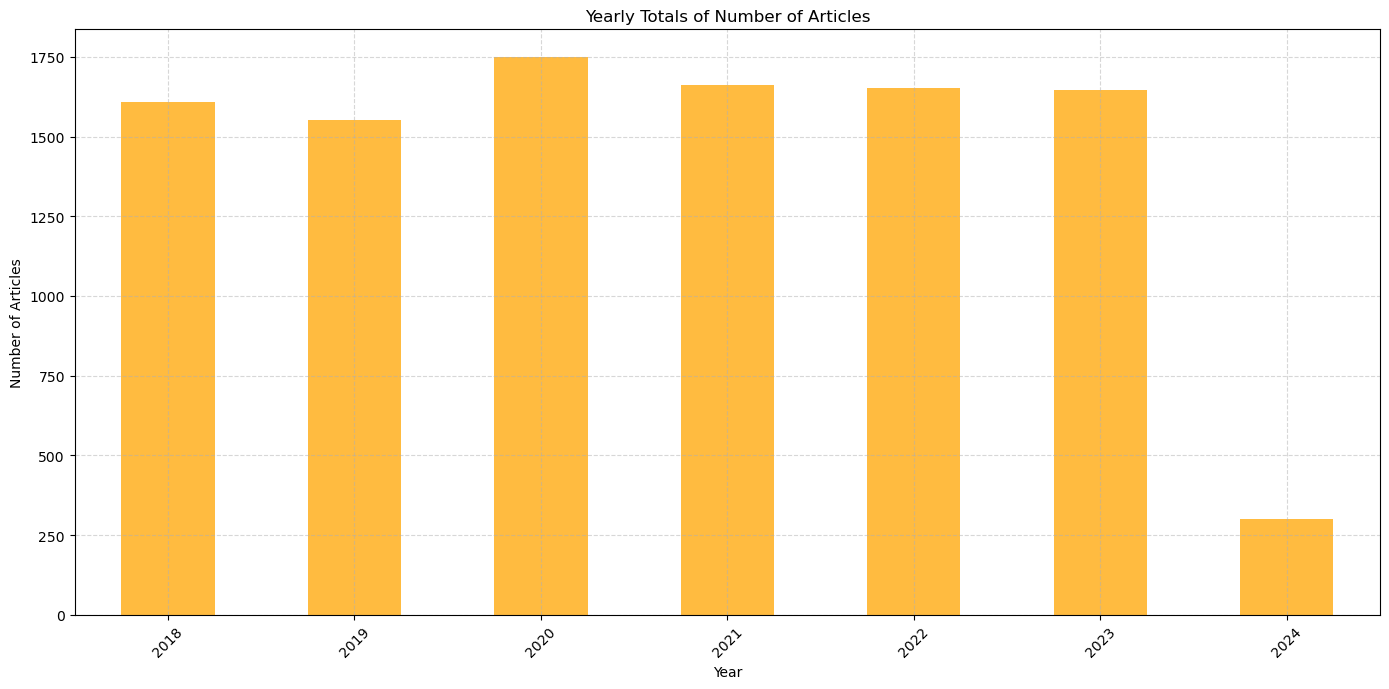

In [196]:
# Group by the year to sum up the articles
yearly_totals_from_csv = df.groupby(df['Date'].dt.year)['Number of Articles'].sum()

# Plotting
plt.figure(figsize=(14, 7))
yearly_totals_from_csv.plot(kind='bar', color='orange', alpha=0.75)

# Set the x-axis labels to be the years
plt.xticks(ticks=np.arange(len(yearly_totals_from_csv)), labels=yearly_totals_from_csv.index, rotation=45)

plt.title('Yearly Totals of Number of Articles')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()


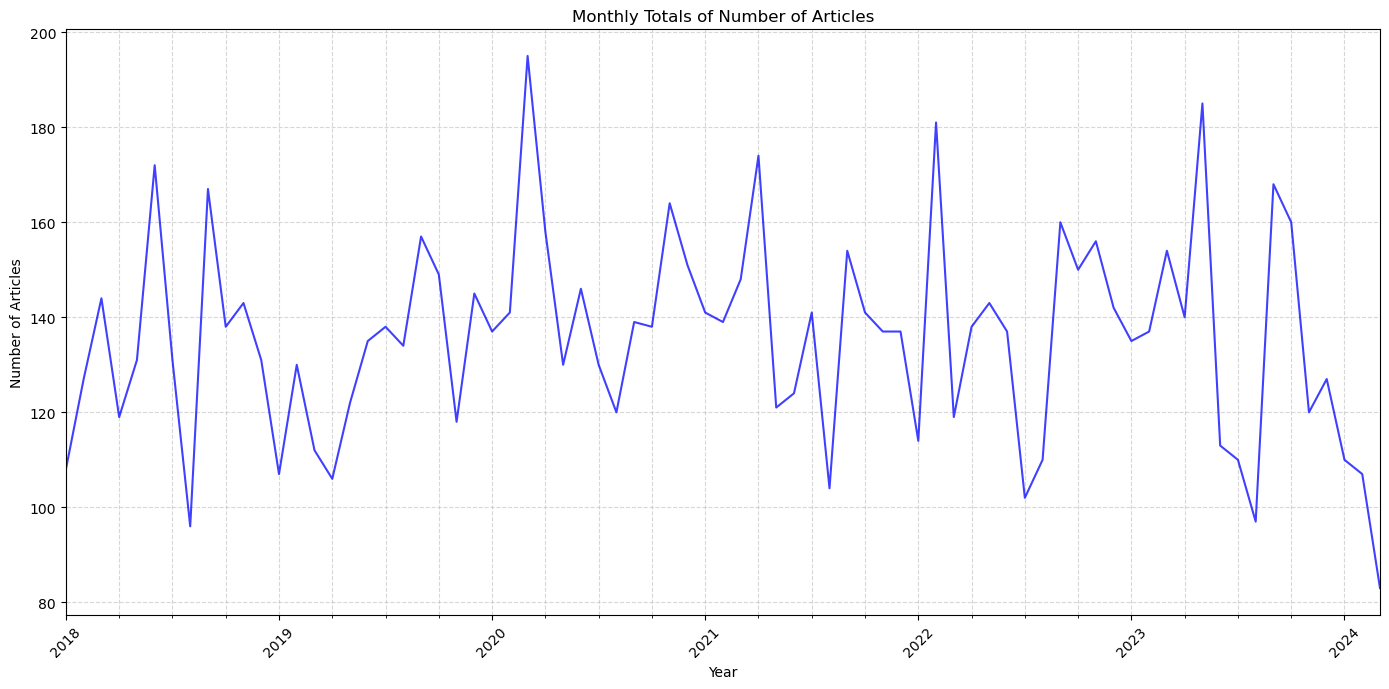

In [198]:

# Resample the data to monthly totals
monthly_totals_from_csv = df.resample('M', on='Date')['Number of Articles'].sum()

# Plotting
plt.figure(figsize=(14, 7))
monthly_totals_from_csv.plot(kind='line', color='blue', alpha=0.75)

# Set the x-axis labels to be the years, and only show the labels for January of each year
plt.xticks(ticks=[pd.to_datetime(f'01-01-{year}') for year in range(2018, 2025)], 
           labels=range(2018, 2025), rotation=45)

plt.title('Monthly Totals of Number of Articles')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()


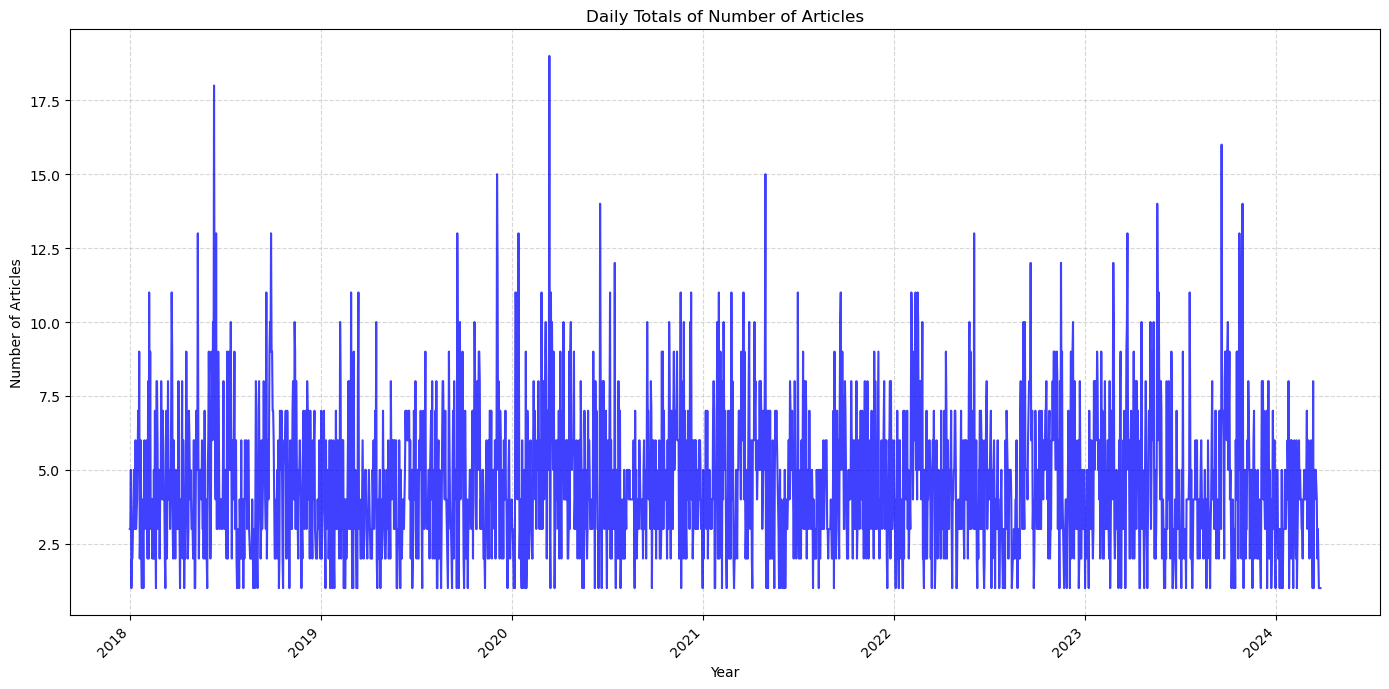

In [214]:
# Plotting with updated x-axis to show only the years
plt.figure(figsize=(14, 7))
daily_totals.plot(kind='line', color='blue', alpha=0.75)

# Set the x-axis labels to display only the years
yearly_labels = pd.date_range(start=daily_totals.index.min(), end=daily_totals.index.max(), freq='YS')

plt.xticks(ticks=yearly_labels, labels=[label.year for label in yearly_labels], rotation=45)

plt.title('Daily Totals of Number of Articles')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()


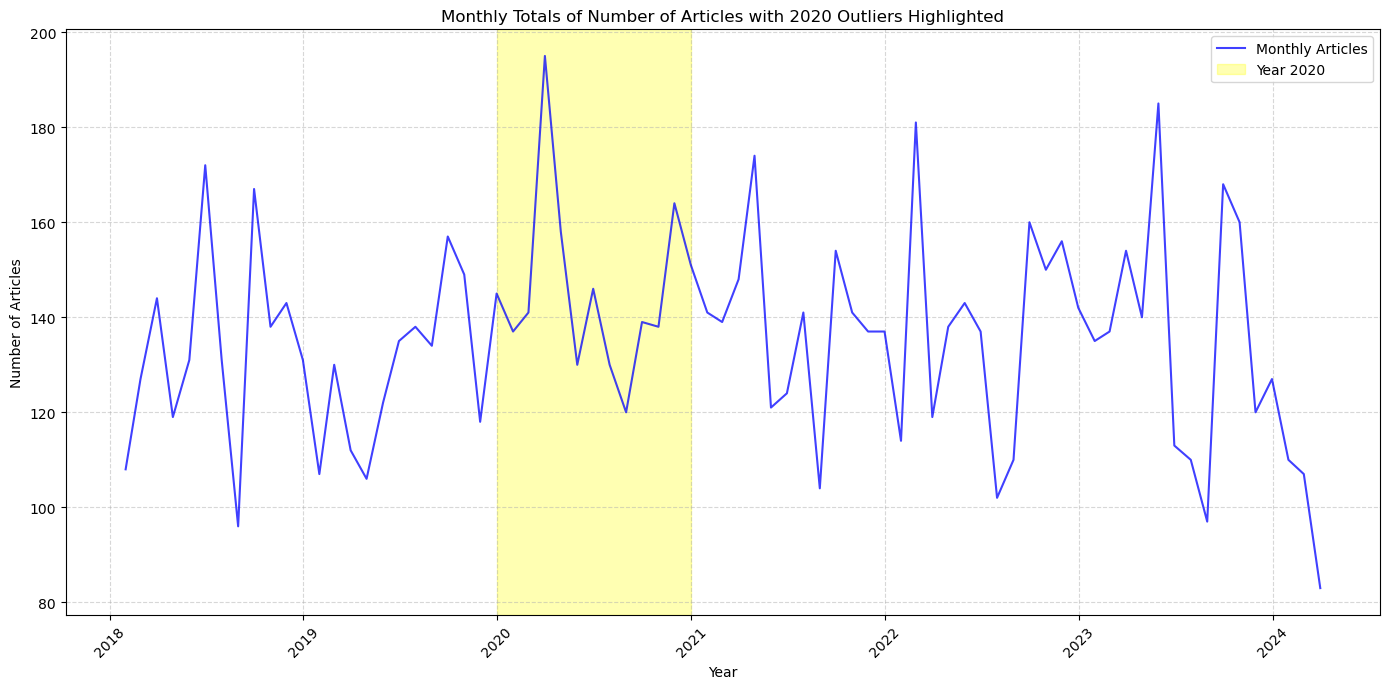

In [202]:
# Adjusting the plotting code to ensure outliers are visible
monthly_totals_from_csv = df.resample('M', on='Date')['Number of Articles'].sum()

# Plotting with emphasis on 2020 outliers with increased marker size
plt.figure(figsize=(14, 7))
plt.plot(monthly_totals_from_csv.index, monthly_totals_from_csv, label='Monthly Articles', color='blue', alpha=0.75)

# Check if there are outliers to plot, then adjust marker settings
if not outliers_2020.empty:
    plt.scatter(outliers_2020.index, outliers_2020, color='red', label='2020 Outliers', s=100, zorder=5)

# Highlighting the year 2020 on the x-axis
plt.axvspan(pd.to_datetime('2020-01-01'), pd.to_datetime('2020-12-31'), color='yellow', alpha=0.3, label='Year 2020')

plt.xticks(ticks=[pd.to_datetime(f'01-01-{year}') for year in range(2018, 2025)], 
           labels=range(2018, 2025), rotation=45)

plt.title('Monthly Totals of Number of Articles with 2020 Outliers Highlighted')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [205]:
!pip install wordcloud


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/ac/66/937d1d73389c0b501c928c4d8513653063d2b40272dff70d0e283d8b9144/wordcloud-1.9.3-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 4.7 MB/s eta 0:00:00


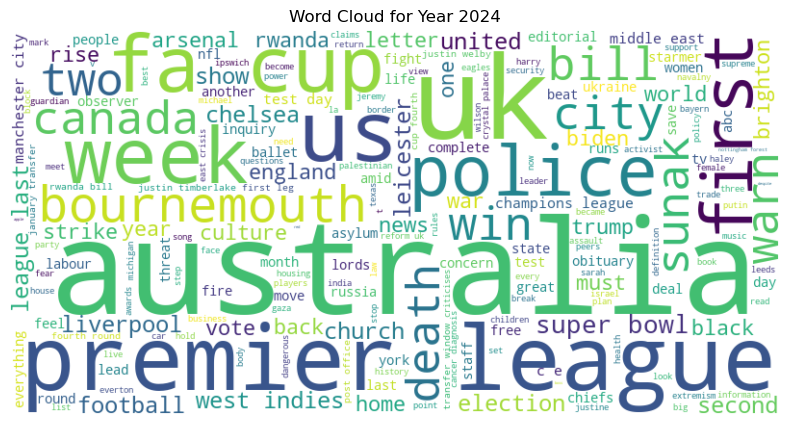

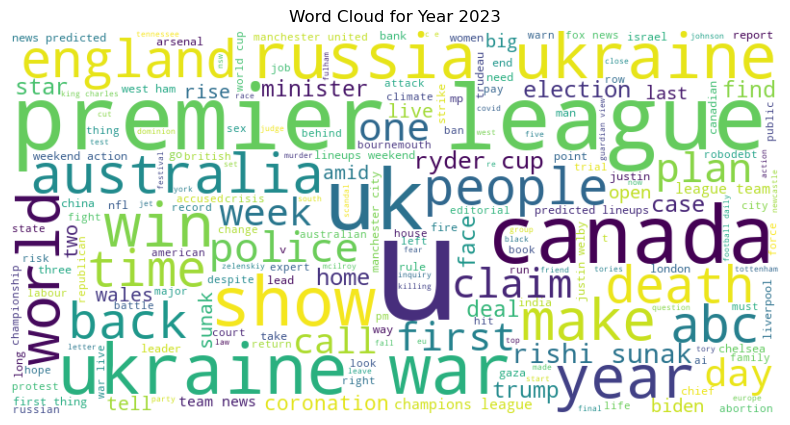

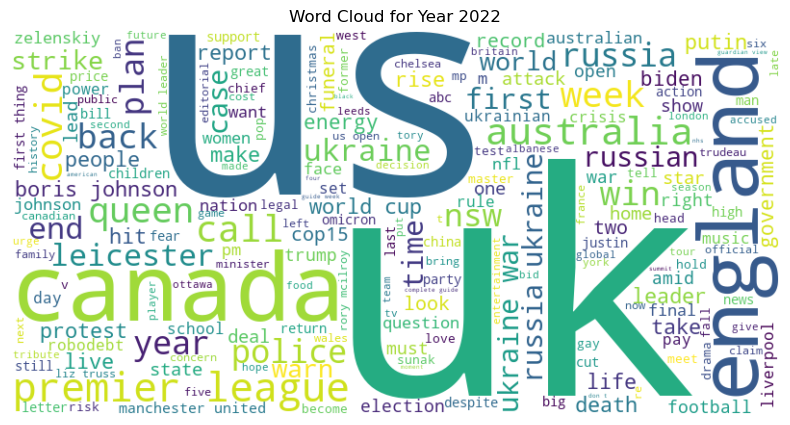

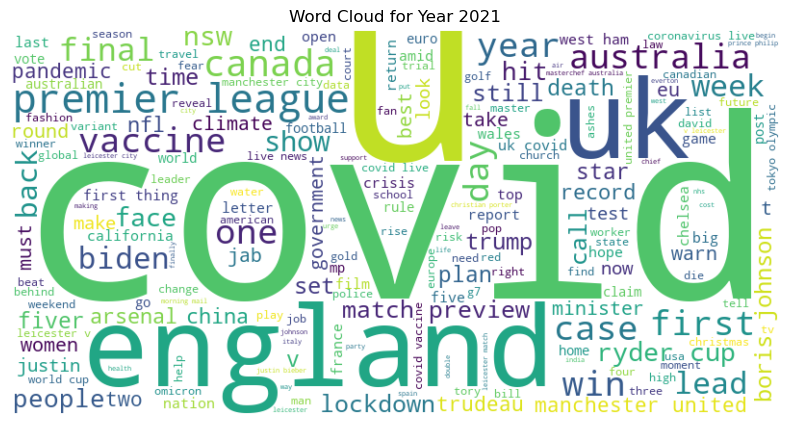

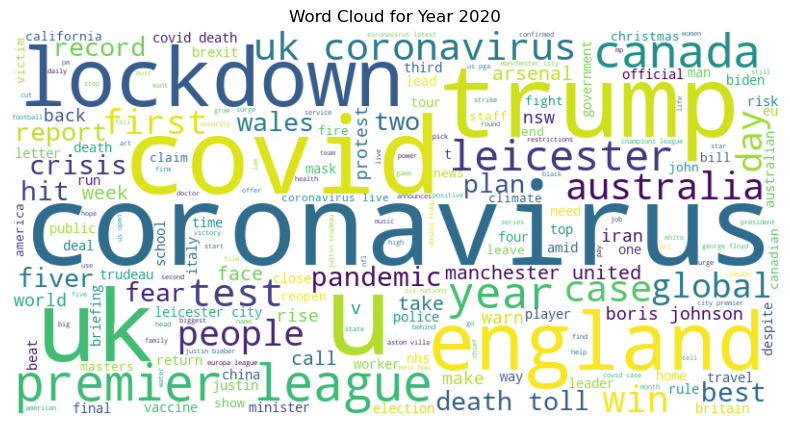

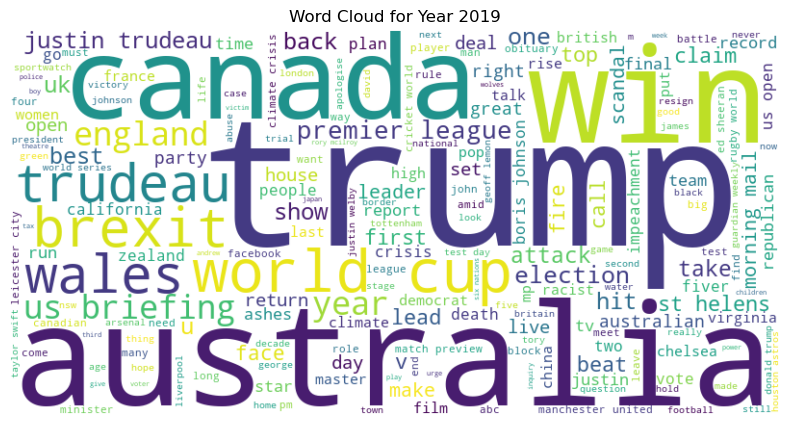

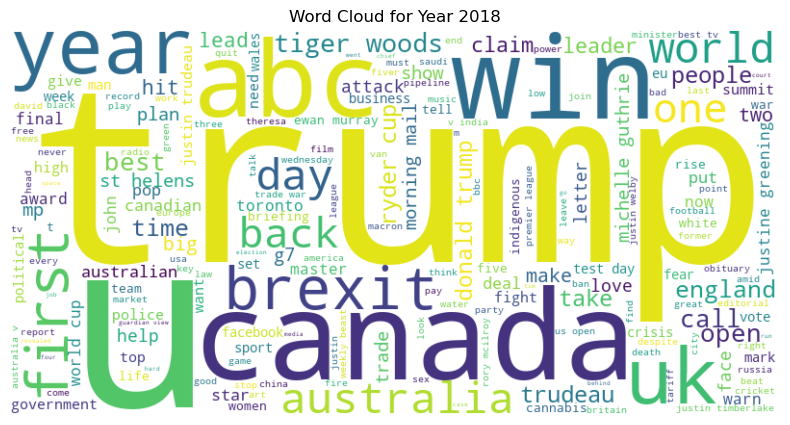

In [212]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import json
from collections import defaultdict

# Load your JSON file
file_path = 'articles2.json'  # Update with your file path
with open(file_path, 'r') as file:
    articles = json.load(file)

# Define additional stop words
additional_stopwords = {'review','says','say','S','a', 'an', 'the', 'new', 'happened', 'is', 'of', 'and', 'in', 'to', 'for', 'on', 'with', 'as', 'it', 'by', 'this', 'that', 'from', 'be', 'are', 'was', 'were', 'have', 'has', 'had', 'will', 'shall', 'may', 'can', 'its', 'but', 'at', 'which', 'if', 'or', 'we', 'you', 'they', 'he', 'she', 'his', 'her', 'their', 'our', 'your'}

# Combine NLTK's stop words with your additional stop words
final_stopwords = set(STOPWORDS).union(additional_stopwords)

# Initialize a dictionary to hold all text by year
text_by_year = defaultdict(str)

# Process articles to accumulate text by year, excluding stop words
for article in articles:
    year = article['webPublicationDate'][:4]
    # Split the title into words, exclude stop words, then rejoin
    words = [word for word in article.get('webTitle', '').lower().split() if word not in final_stopwords]
    text_by_year[year] += ' ' + ' '.join(words)

# Now, generate and display a word cloud for each year, excluding stop words
for year, text in text_by_year.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=final_stopwords).generate(text)
    
    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Year {year}')
    plt.axis('off')
    plt.show()


In [213]:
import requests
import pandas as pd
from datetime import datetime, timedelta
from collections import defaultdict
import matplotlib.pyplot as plt  

def fetch_articles(api_key, query, from_date, to_date, page_size=200):
    base_url = "https://content.guardianapis.com/search"
    articles = []
    current_page = 1
    total_pages = 1  # Initialized with 1 to ensure the loop starts
    
    print(f"Fetching articles for {query} from {from_date} to {to_date}...")
    
    while current_page <= total_pages:
        params = {
            'api-key': api_key,
            'q': query,
            'from-date': from_date,
            'to-date': to_date,
            'page': current_page,
            'page-size': page_size,
            'order-by': "newest"
        }
        
        response = requests.get(base_url, params=params)
        data = response.json()
        
        if data['response']['status'] == 'ok':
            articles.extend(data['response']['results'])
            if current_page % 10 == 0 or current_page == 1 or current_page == total_pages:
                print(f"Processed page {current_page} of {data['response']['pages']}.")
            current_page += 1
            total_pages = data['response']['pages']
        else:
            print("Error fetching the data: ", data['response']['status'])
            break

    print(f"Finished fetching articles. Total articles fetched: {len(articles)}")
    return articles

def process_new_articles(new_articles):
    articles_count = defaultdict(int)
    section_names = defaultdict(set)

    for article in new_articles:
        date = article['webPublicationDate'].split('T')[0]  # Extract just the date part
        section = article['sectionName']
        articles_count[(date, section)] += 1
        section_names[date].add(section)
        
    data_for_df = []

    for (date, section), count in articles_count.items():
        data_for_df.append({
            'Date': date,
            'Number of Articles': count,
            'SectionName': section
        })

    # Create DataFrame
    df = pd.DataFrame(data_for_df)

    # Optionally, sort by Date and then SectionName for better readability
    df.sort_values(by=['Date', 'SectionName'], inplace=True)
    return df


    
def update_data_and_plot(api_key, query, csv_file_path):
    # Load existing data and find the last date
    try:
        df_existing = pd.read_csv(csv_file_path, parse_dates=['Date'])
        last_date = df_existing['Date'].max()
    except (FileNotFoundError, pd.errors.EmptyDataError):
        df_existing = pd.DataFrame(columns=['Date', 'Number of Articles', 'SectionName'])
        last_date = pd.Timestamp('2018-01-01')  # Start from 2018 if no file exists

    # Fetch articles from the day after the last date in the CSV to today
    from_date = (last_date + timedelta(days=1)).strftime('%Y-%m-%d')
    to_date = datetime.now().strftime('%Y-%m-%d')
    new_articles = fetch_articles(api_key, query, from_date, to_date)

    # Check if new articles were fetched before continuing
    if new_articles:
        df = process_new_articles(new_articles)  # You will need to define this function

        # Append the new data to the existing data
        df_updated = pd.concat([df_existing, df], ignore_index=True, sort=False)
        df_updated.drop_duplicates(subset=['Date', 'SectionName'], keep='last', inplace=True)
        df_updated.sort_values(by=['Date', 'SectionName'], inplace=True)
        df_updated.to_csv(csv_file_path, index=False)

        # Resample the data to monthly totals
        monthly_totals_from_csv = df_updated.resample('M', on='Date')['Number of Articles'].sum()

        # Plotting
        plt.figure(figsize=(14, 7))
        monthly_totals_from_csv.plot(kind='line', color='blue', alpha=0.75)

        # Set the x-axis labels to be the years, and only show the labels for January of each year
        plt.xticks(ticks=[pd.to_datetime(f'01-01-{year}') for year in range(2018, datetime.now().year + 1)], 
                   labels=range(2018, datetime.now().year + 1), rotation=45)

        plt.title('Monthly Totals of Number of Articles')
        plt.xlabel('Year')
        plt.ylabel('Number of Articles')
        plt.grid(True, which='both', linestyle='--', alpha=0.5)
        plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
        plt.show()
    else:
        print("No new articles to update.")


# Set your API key and file path
# api_key = 'YOUR_API_KEY'
query = "Justin Trudeau"
csv_file_path = 'path/to/your/articles_count.csv'

update_data_and_plot(api_key, query, csv_file_path)


SyntaxError: invalid syntax (1776092947.py, line 55)

In [ ]:
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.base import MIMEBase
from email import encoders
import os
import requests
import pandas as pd
from datetime import datetime, timedelta
from collections import defaultdict
import matplotlib.pyplot as plt  

# Define functions for fetching articles, processing data, and plotting

def fetch_articles(api_key, query, from_date, to_date, page_size=200):
    base_url = "https://content.guardianapis.com/search"
    articles = []
    current_page = 1
    total_pages = 1  # Initialized with 1 to ensure the loop starts
    
    print(f"Fetching articles for {query} from {from_date} to {to_date}...")
    
    while current_page <= total_pages:
        params = {
            'api-key': api_key,
            'q': query,
            'from-date': from_date,
            'to-date': to_date,
            'page': current_page,
            'page-size': page_size,
            'order-by': "newest"
        }
        
        response = requests.get(base_url, params=params)
        data = response.json()
        
        if data['response']['status'] == 'ok':
            articles.extend(data['response']['results'])
            if current_page % 10 == 0 or current_page == 1 or current_page == total_pages:
                print(f"Processed page {current_page} of {data['response']['pages']}.")
            current_page += 1
            total_pages = data['response']['pages']
        else:
            print("Error fetching the data: ", data['response']['status'])
            break

    print(f"Finished fetching articles. Total articles fetched: {len(articles)}")
    return articles

def process_new_articles(new_articles):
    articles_count = defaultdict(int)
    section_names = defaultdict(set)

    for article in new_articles:
        date = article['webPublicationDate'].split('T')[0]  # Extract just the date part
        section = article['sectionName']
        articles_count[(date, section)] += 1
        section_names[date].add(section)
        
    data_for_df = []

    for (date, section), count in articles_count.items():
        data_for_df.append({
            'Date': date,
            'Number of Articles': count,
            'SectionName': section
        })

    # Create DataFrame
    df = pd.DataFrame(data_for_df)

    # Optionally, sort by Date and then SectionName for better readability
    df.sort_values(by=['Date', 'SectionName'], inplace=True)
    return df


    
def update_data_and_plot(api_key, query, csv_file_path):
    # Load existing data and find the last date
    try:
        df_existing = pd.read_csv(csv_file_path, parse_dates=['Date'])
        last_date = df_existing['Date'].max()
    except (FileNotFoundError, pd.errors.EmptyDataError):
        df_existing = pd.DataFrame(columns=['Date', 'Number of Articles', 'SectionName'])
        last_date = pd.Timestamp('2018-01-01')  # Start from 2018 if no file exists

    # Fetch articles from the day after the last date in the CSV to today
    from_date = (last_date + timedelta(days=1)).strftime('%Y-%m-%d')
    to_date = datetime.now().strftime('%Y-%m-%d')
    new_articles = fetch_articles(api_key, query, from_date, to_date)

    # Check if new articles were fetched before continuing
    if new_articles:
        df = process_new_articles(new_articles)  # You will need to define this function

        # Append the new data to the existing data
        df_updated = pd.concat([df_existing, df], ignore_index=True, sort=False)
        df_updated.drop_duplicates(subset=['Date', 'SectionName'], keep='last', inplace=True)
        df_updated.sort_values(by=['Date', 'SectionName'], inplace=True)
        df_updated.to_csv(csv_file_path, index=False)

        # Resample the data to monthly totals
        monthly_totals_from_csv = df_updated.resample('M', on='Date')['Number of Articles'].sum()

        # Plotting
        plt.figure(figsize=(14, 7))
        monthly_totals_from_csv.plot(kind='line', color='blue', alpha=0.75)

        # Set the x-axis labels to be the years, and only show the labels for January of each year
        plt.xticks(ticks=[pd.to_datetime(f'01-01-{year}') for year in range(2018, datetime.now().year + 1)], 
                   labels=range(2018, datetime.now().year + 1), rotation=45)

        plt.title('Monthly Totals of Number of Articles')
        plt.xlabel('Year')
        plt.ylabel('Number of Articles')
        plt.grid(True, which='both', linestyle='--', alpha=0.5)
        plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

        # Save plot as PNG file
        plt.savefig('plot.png')

        # Close the plot to free up memory
        plt.close()
        
        
        
        # Plotting
        plt.figure(figsize=(14, 7))
        monthly_totals_from_csv.plot(kind='line', color='blue', alpha=0.75)
        plt.title('Monthly Totals of Number of Articles')
        plt.xlabel('Date')
        plt.ylabel('Number of Articles')
        plt.grid(True, which='both', linestyle='--', alpha=0.5)
        plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
        
        # Save plot to file
        plt.savefig('plot.png')

        # Close the plot to free up memory
        plt.close()
        
        
    else:
        print("No new articles to update.")


# Function to send email with attached plot to multiple recipients
def send_email(sender_email, sender_password, recipient_emails, subject, body, attachment_path):
    for recipient_email in recipient_emails:
        # Create a multipart message
        msg = MIMEMultipart()
        msg['From'] = sender_email
        msg['To'] = recipient_email
        msg['Subject'] = subject

        # Attach body
        msg.attach(MIMEText(body, 'plain'))

        # Attach plot
        with open(attachment_path, 'rb') as attachment:
            part = MIMEBase('application', 'octet-stream')
            part.set_payload(attachment.read())
        encoders.encode_base64(part)
        part.add_header('Content-Disposition', f'attachment; filename= {os.path.basename(attachment_path)}')
        msg.attach(part)

        # Connect to SMTP server and send email
        server = smtplib.SMTP('smtp.example.com', 587)  # Update with your SMTP server details
        server.starttls()
        server.login(sender_email, sender_password)
        text = msg.as_string()
        server.sendmail(sender_email, recipient_email, text)
        server.quit()



# Main function to update data and plot daily
def main():
    # Set your API key and file path
    api_key = 'YOUR_API_KEY'
    query = "Justin Trudeau"
    csv_file_path = 'path/to/your/articles_count.csv'

    # Update data and plot
    update_data_and_plot(api_key, query, csv_file_path)

    # Send email with plot
    sender_email = 'your_email@example.com'
    sender_password = 'your_email_password'
    receiver_email = 'recipient@example.com'
    subject = 'Daily Article Plot'
    body = 'Please find attached the daily plot of articles.'
    attachment_path = 'path/to/your/plot.png'

    # Usage
    recipient_emails = ['recipient1@example.com', 'recipient2@example.com', 'recipient3@example.com']
    send_email(sender_email, sender_password, recipient_emails, subject, body, attachment_path)

if __name__ == "__main__":
    main()
